# Kholby Lawson
CS 544
AP1

In [2]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [3]:
'''
    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)
'''

names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin','Car Name']
raw_data = pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace=True, names=names, na_values=['?'])
raw_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino


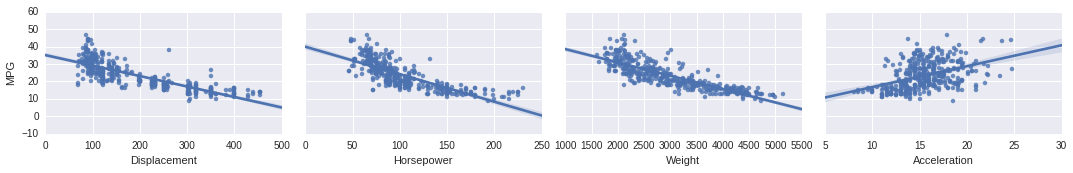

In [21]:
features = ['Displacement', 'Horsepower', 'Weight', 'Acceleration']
data = raw_data.dropna()
sns.pairplot(data, x_vars=['Displacement','Horsepower', 'Weight', 'Acceleration'], y_vars='MPG', aspect=1.5, kind='reg')

In [23]:
# regression with all 4 features
X = data[features]
y = data.MPG
linreg = LinearRegression()
linreg.fit(X,y)
print linreg.coef_
print linreg.intercept_
linreg.score(X, y)

[-0.00600087 -0.04360773 -0.00528051 -0.023148  ]
45.2511396993


0.70698118657198994

The coefficient of determination for the model above is about 0.71.  This can be interpreted as saying that 71% of the variance in the response is explained by the variables in this model.

In [24]:
# regression with Displacement only
X = data[['Displacement']]
linreg.fit(X,y)
print linreg.coef_
print linreg.intercept_
linreg.score(X,y)

[-0.06005143]
35.1206359384


0.64822940031930443

In [25]:
# regression with Horsepower only
X = data[['Horsepower']]
linreg.fit(X,y)
print linreg.coef_
print linreg.intercept_
linreg.score(X,y)

[-0.15784473]
39.9358610212


0.60594825788943507

In [26]:
# regression with Weight only
X = data[['Weight']]
linreg.fit(X,y)
print linreg.coef_
print linreg.intercept_
linreg.score(X,y)

[-0.00764734]
46.216524549


0.69263043312062544

In [27]:
# regression with Acceleration only
X = data[['Acceleration']]
linreg.fit(X,y)
print linreg.coef_
print linreg.intercept_
linreg.score(X,y)

[ 1.19762419]
4.83324980484


0.1792070501562546

Of the four predictors used above, weight is the most effective at predicting MPG.  Its coefficient is about -0.0075, which can be interpreted as indicating that a 1 pound reduction in weight would affect a 0.0075 MPG increase in fuel economy.

We should still be able to use linear regression even after including the number of cylinders in our feature set.Furthermore, these values have an ordered relationship, so the values should not need to be modified to work correctly as the market area features were in the example.  With this approach, the code is very similar to each of the approaches above, and the resulting model has a coefficient of determination of 0.708, which is slightly higher than any of the previous models, indicating that this models explains just a bit more of the variance.

In [29]:
#regression with displacement, horsepower, weight, acceleration, and cylinders
features = ['Displacement','Horsepower', 'Weight', 'Acceleration', 'Cylinders']
X = data[features]
linreg.fit(X,y)
print linreg.coef_
print linreg.intercept_
linreg.score(X,y)

[ -8.31301222e-05  -4.52570802e-02  -5.18691735e-03  -2.91047140e-02
  -3.97928359e-01]
46.2643078526


0.70769263267705163